<a href="https://colab.research.google.com/github/bchandhu/CS529HW1/blob/master/Fake_currency_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!git clone https://github.com/bchandhu/FakeCurrencyDetectionSystem.git


Cloning into 'FakeCurrencyDetectionSystem'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 66 (delta 6), reused 47 (delta 0), pack-reused 3
Receiving objects: 100% (66/66), 6.42 MiB | 15.81 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [4]:
# Import all necessary modules
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model, load_model
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#define height and width of the image
height=300
width=300

#create a ResNet50 model instance without the top layer as we will add our own top layer
base_model=ResNet50(weights='imagenet',include_top=False,input_shape=(height,width,3))

94765736/94765736 [==============================] - 1s 0us/step


In [6]:
#define directory containing training and validation data
train_dir="/content/FakeCurrencyDetectionSystem/Dataset/Training"
validation_dir="/content/FakeCurrencyDetectionSystem/Dataset/Validation"

#number of batches the data has to be divided into
batch_size=8

#create datagen and generator to load the data from training directory
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=90,horizontal_flip=True,vertical_flip=True)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(height,width),batch_size=batch_size)

#create datagen and generator to load the data from validation directory
validation_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=90,horizontal_flip=True,vertical_flip=True)
validation_generator=validation_datagen.flow_from_directory(validation_dir,target_size=(height,width),batch_size=batch_size)

Found 35 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [7]:
#our own model which will be added onto the ResNet50 model
def build_finetune_model(base_model,dropout,fc_layers,num_classes):
    for layer in base_model.layers:
        layer.trainable=False

    x=base_model.output
    x=Flatten()(x)
    for fc in fc_layers:
        x=Dense(fc,activation='relu')(x)
        x=Dropout(dropout)(x)

    predictions=Dense(num_classes,activation='softmax')(x)

    finetune_model=Model(inputs=base_model.input,outputs=predictions)

    return finetune_model

class_list=['Real','Fake'] #the labels of our data
FC_Layers=[1024,1024]
dropout=0.5

finetune_model=build_finetune_model(base_model,dropout=dropout,fc_layers=FC_Layers,num_classes=len(class_list))

In [8]:
#define number of epochs(the number of times the model will be trained) and number of training images
num_epochs=100
num_train_images=35

In [9]:
#checkpoint in case anything goes wrong
checkpoint=ModelCheckpoint("Final_model.h5",monitor='val_acc',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',period=1)
early=EarlyStopping(monitor='val_acc',min_delta=0,patience=40,verbose=1,mode="auto")

#compile the model before using
finetune_model.compile(loss="categorical_crossentropy",optimizer=optimizers.SGD(lr=0.000001,momentum=0.9),metrics=['accuracy'])

#train the model
finetune_model.fit_generator(generator=train_generator,steps_per_epoch=num_train_images//batch_size,epochs=num_epochs,validation_data=validation_generator,validation_steps=1,callbacks=[checkpoint,early])

#save the model
finetune_model.save_weights("Final_model.h5")

<ipython-input-9-c4ac6982538f>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  finetune_model.fit_generator(generator=train_generator,steps_per_epoch=num_train_images//batch_size,epochs=num_epochs,validation_data=validation_generator,validation_steps=1,callbacks=[checkpoint,early])


Epoch 1/100
4/4 [==============================] - ETA: 0s - loss: 2867.7737 - accuracy: 0.5556

4/4 [==============================] - 30s 7s/step - loss: 2867.7737 - accuracy: 0.5556 - val_loss: 26514966.0000 - val_accuracy: 0.7143
Epoch 2/100
4/4 [==============================] - ETA: 0s - loss: 618168729189990006784.0000 - accuracy: 0.4815

4/4 [==============================] - 18s 5s/step - loss: 618168729189990006784.0000 - accuracy: 0.4815 - val_loss: 862191538555045603678995087360.0000 - val_accuracy: 0.7143
Epoch 3/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5556

4/4 [==============================] - 24s 5s/step - loss: nan - accuracy: 0.5556 - val_loss: nan - val_accuracy: 0.2857
Epoch 4/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4688

4/4 [==============================] - 21s 6s/step - loss: nan - accuracy: 0.4688 - val_loss: nan - val_accuracy: 0.2857
Epoch 5/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4062

4/4 [==============================] - 23s 6s/step - loss: nan - accuracy: 0.4062 - val_loss: nan - val_accuracy: 0.2857
Epoch 6/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4815

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4815 - val_loss: nan - val_accuracy: 0.2857
Epoch 7/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444

4/4 [==============================] - 19s 5s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 8/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5556

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.5556 - val_loss: nan - val_accuracy: 0.2857
Epoch 9/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444

4/4 [==============================] - 22s 5s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 10/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4815

4/4 [==============================] - 21s 5s/step - loss: nan - accuracy: 0.4815 - val_loss: nan - val_accuracy: 0.2857
Epoch 11/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444

4/4 [==============================] - 20s 5s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 12/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444 

4/4 [==============================] - 36s 10s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 13/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 25s 6s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 14/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444

4/4 [==============================] - 23s 5s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 15/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444

4/4 [==============================] - 20s 5s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 16/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4375

4/4 [==============================] - 20s 5s/step - loss: nan - accuracy: 0.4375 - val_loss: nan - val_accuracy: 0.2857
Epoch 17/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4815

4/4 [==============================] - 19s 5s/step - loss: nan - accuracy: 0.4815 - val_loss: nan - val_accuracy: 0.2857
Epoch 18/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4815

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4815 - val_loss: nan - val_accuracy: 0.2857
Epoch 19/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.3704

4/4 [==============================] - 21s 5s/step - loss: nan - accuracy: 0.3704 - val_loss: nan - val_accuracy: 0.2857
Epoch 20/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4815

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4815 - val_loss: nan - val_accuracy: 0.2857
Epoch 21/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4375

4/4 [==============================] - 22s 6s/step - loss: nan - accuracy: 0.4375 - val_loss: nan - val_accuracy: 0.2857
Epoch 22/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.3333

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.2857
Epoch 23/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444

4/4 [==============================] - 29s 6s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 24/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 25/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 26/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.3704

4/4 [==============================] - 19s 5s/step - loss: nan - accuracy: 0.3704 - val_loss: nan - val_accuracy: 0.2857
Epoch 27/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 28/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5185

4/4 [==============================] - 20s 5s/step - loss: nan - accuracy: 0.5185 - val_loss: nan - val_accuracy: 0.2857
Epoch 29/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 30/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444

4/4 [==============================] - 19s 5s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 31/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4815

4/4 [==============================] - 19s 5s/step - loss: nan - accuracy: 0.4815 - val_loss: nan - val_accuracy: 0.2857
Epoch 32/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.3704

4/4 [==============================] - 19s 5s/step - loss: nan - accuracy: 0.3704 - val_loss: nan - val_accuracy: 0.2857
Epoch 33/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.3704

4/4 [==============================] - 21s 5s/step - loss: nan - accuracy: 0.3704 - val_loss: nan - val_accuracy: 0.2857
Epoch 34/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4062

4/4 [==============================] - 23s 6s/step - loss: nan - accuracy: 0.4062 - val_loss: nan - val_accuracy: 0.2857
Epoch 35/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.3333

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.2857
Epoch 36/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444

4/4 [==============================] - 19s 5s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 37/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4688

4/4 [==============================] - 20s 5s/step - loss: nan - accuracy: 0.4688 - val_loss: nan - val_accuracy: 0.2857
Epoch 38/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444

4/4 [==============================] - 20s 5s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 39/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 40/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 41/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 22s 5s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 42/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444

4/4 [==============================] - 21s 5s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 43/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 44/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.3750

4/4 [==============================] - 21s 5s/step - loss: nan - accuracy: 0.3750 - val_loss: nan - val_accuracy: 0.2857
Epoch 45/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4375

4/4 [==============================] - 20s 5s/step - loss: nan - accuracy: 0.4375 - val_loss: nan - val_accuracy: 0.2857
Epoch 46/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4375

4/4 [==============================] - 20s 5s/step - loss: nan - accuracy: 0.4375 - val_loss: nan - val_accuracy: 0.2857
Epoch 47/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.3750

4/4 [==============================] - 21s 5s/step - loss: nan - accuracy: 0.3750 - val_loss: nan - val_accuracy: 0.2857
Epoch 48/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4688

4/4 [==============================] - 29s 8s/step - loss: nan - accuracy: 0.4688 - val_loss: nan - val_accuracy: 0.2857
Epoch 49/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444

4/4 [==============================] - 19s 5s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 50/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.3750

4/4 [==============================] - 20s 5s/step - loss: nan - accuracy: 0.3750 - val_loss: nan - val_accuracy: 0.2857
Epoch 51/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5185

4/4 [==============================] - 20s 5s/step - loss: nan - accuracy: 0.5185 - val_loss: nan - val_accuracy: 0.2857
Epoch 52/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 20s 6s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 53/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 54/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444

4/4 [==============================] - 19s 5s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 55/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 56/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.3704

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.3704 - val_loss: nan - val_accuracy: 0.2857
Epoch 57/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444

4/4 [==============================] - 19s 5s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 58/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4375

4/4 [==============================] - 21s 5s/step - loss: nan - accuracy: 0.4375 - val_loss: nan - val_accuracy: 0.2857
Epoch 59/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444

4/4 [==============================] - 21s 5s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 60/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4815

4/4 [==============================] - 21s 5s/step - loss: nan - accuracy: 0.4815 - val_loss: nan - val_accuracy: 0.2857
Epoch 61/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.3333

4/4 [==============================] - 21s 5s/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.2857
Epoch 62/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4815

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4815 - val_loss: nan - val_accuracy: 0.2857
Epoch 63/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4688

4/4 [==============================] - 20s 5s/step - loss: nan - accuracy: 0.4688 - val_loss: nan - val_accuracy: 0.2857
Epoch 64/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4815

4/4 [==============================] - 21s 5s/step - loss: nan - accuracy: 0.4815 - val_loss: nan - val_accuracy: 0.2857
Epoch 65/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4375

4/4 [==============================] - 23s 6s/step - loss: nan - accuracy: 0.4375 - val_loss: nan - val_accuracy: 0.2857
Epoch 66/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4815

4/4 [==============================] - 19s 4s/step - loss: nan - accuracy: 0.4815 - val_loss: nan - val_accuracy: 0.2857
Epoch 67/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 68/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4375

4/4 [==============================] - 22s 6s/step - loss: nan - accuracy: 0.4375 - val_loss: nan - val_accuracy: 0.2857
Epoch 69/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 21s 5s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 70/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4815

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4815 - val_loss: nan - val_accuracy: 0.2857
Epoch 71/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 72/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4815

4/4 [==============================] - 32s 8s/step - loss: nan - accuracy: 0.4815 - val_loss: nan - val_accuracy: 0.2857
Epoch 73/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.3704

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.3704 - val_loss: nan - val_accuracy: 0.2857
Epoch 74/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 20s 5s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 75/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 76/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 77/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 78/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444

4/4 [==============================] - 19s 5s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 79/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4815

4/4 [==============================] - 19s 5s/step - loss: nan - accuracy: 0.4815 - val_loss: nan - val_accuracy: 0.2857
Epoch 80/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 81/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4375

4/4 [==============================] - 21s 5s/step - loss: nan - accuracy: 0.4375 - val_loss: nan - val_accuracy: 0.2857
Epoch 82/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.3704

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.3704 - val_loss: nan - val_accuracy: 0.2857
Epoch 83/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 21s 5s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 84/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 21s 6s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 85/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4375

4/4 [==============================] - 20s 5s/step - loss: nan - accuracy: 0.4375 - val_loss: nan - val_accuracy: 0.2857
Epoch 86/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 87/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.3333

4/4 [==============================] - 20s 5s/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.2857
Epoch 88/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 89/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444

4/4 [==============================] - 18s 5s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 90/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4062

4/4 [==============================] - 21s 5s/step - loss: nan - accuracy: 0.4062 - val_loss: nan - val_accuracy: 0.2857
Epoch 91/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4375

4/4 [==============================] - 20s 5s/step - loss: nan - accuracy: 0.4375 - val_loss: nan - val_accuracy: 0.2857
Epoch 92/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 21s 6s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 93/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.3704

4/4 [==============================] - 20s 5s/step - loss: nan - accuracy: 0.3704 - val_loss: nan - val_accuracy: 0.2857
Epoch 94/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5185

4/4 [==============================] - 19s 5s/step - loss: nan - accuracy: 0.5185 - val_loss: nan - val_accuracy: 0.2857
Epoch 95/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4375

4/4 [==============================] - 19s 5s/step - loss: nan - accuracy: 0.4375 - val_loss: nan - val_accuracy: 0.2857
Epoch 96/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.3704

4/4 [==============================] - 21s 5s/step - loss: nan - accuracy: 0.3704 - val_loss: nan - val_accuracy: 0.2857
Epoch 97/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4444

4/4 [==============================] - 20s 5s/step - loss: nan - accuracy: 0.4444 - val_loss: nan - val_accuracy: 0.2857
Epoch 98/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4074

4/4 [==============================] - 29s 8s/step - loss: nan - accuracy: 0.4074 - val_loss: nan - val_accuracy: 0.2857
Epoch 99/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4815

4/4 [==============================] - 20s 5s/step - loss: nan - accuracy: 0.4815 - val_loss: nan - val_accuracy: 0.2857
Epoch 100/100
4/4 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4375

4/4 [==============================] - 22s 6s/step - loss: nan - accuracy: 0.4375 - val_loss: nan - val_accuracy: 0.2857


1/1 [==============================] - 1s 589ms/step
Real


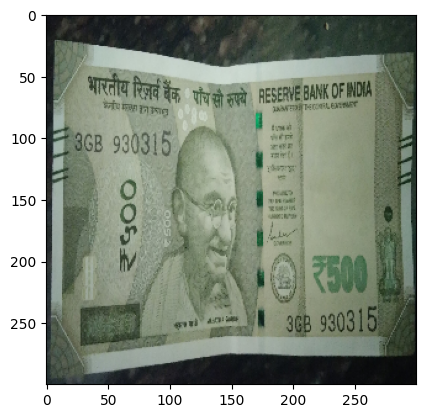

In [46]:
#testing the model
# Import necessary modules
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the testing image
img = image.load_img("/content/FakeCurrencyDetectionSystem/Dataset/Testing/Real.jpg", target_size=(300, 300))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

# Assuming 'finetune_model' is already defined and loaded with weights
finetune_model.load_weights("Final_model.h5")

# Predict the image using the model
output = finetune_model.predict(img)

# Compare the output and print the result
if output[0][0] > output[0][1]:
    print("Fake")
else:
    print("Real")


1/1 [==============================] - 1s 599ms/step
Fake


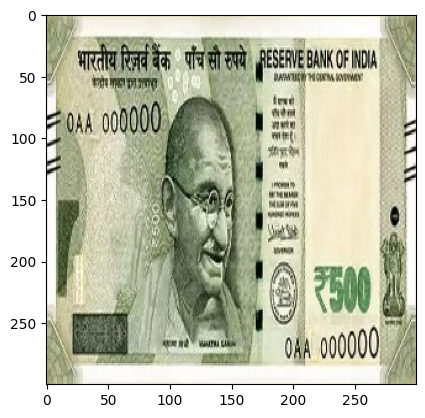

In [48]:
#testing the model
img=image.load_img("/content/FakeCurrencyDetectionSystem/Dataset/Training/Fake/4f.jpg",target_size=(300,300)) #The path of the testing image,the pic taken from the phone should come here
img=np.asarray(img)
plt.imshow(img)
img=np.expand_dims(img,axis=0)
finetune_model.load_weights("Final_model.h5")

output=finetune_model.predict(img) #predicting the image using model created
if(output[0][0]>output[0][1]): #comparison
    print("Fake")
else:
    print("Real")

1/1 [==============================] - 1s 577ms/step
Real


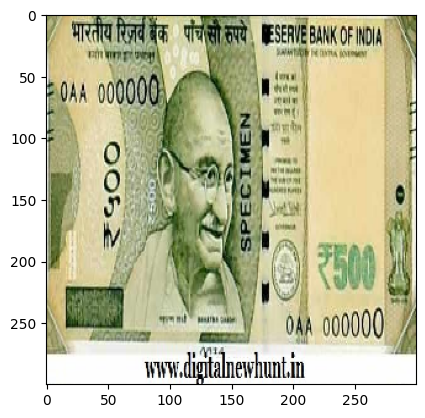

In [53]:
#testing the model
img=image.load_img("/content/FakeCurrencyDetectionSystem/Dataset/Training/Fake/93.jpg",target_size=(300,300)) #the path of the testing image,the pic taken from the
img=np.asarray(img)
plt.imshow(img)
img=np.expand_dims(img,axis=0)
finetune_model.load_weights("Final_model.h5")

output=finetune_model.predict(img)
if(output[0][0]>output[0][1]):
    print("Fake")
else:
    print("Real")